# Source

[An introduction to the bootstrap method](https://towardsdatascience.com/an-introduction-to-the-bootstrap-method-58bcb51b4d60)

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Scenario case

Summarize how many times a day students in a 100-student lab picks up their phones. Here's one way of doing it:
* online survey
* you receive the response of 30 students

In [2]:
# Construct a population of pickups for the lab
np.random.seed(1013)
pickups = np.random.randint(0, 500, size=100)
pickups

array([200, 374, 442,  78, 289, 376, 144, 275, 352, 463, 144, 271,  77,
       235, 245, 467, 180, 457, 352, 212,  11,  65, 207, 479, 327, 282,
        16,  51,  33, 430, 180, 140, 333, 497, 218, 263, 380, 401, 482,
       428, 475, 344, 193,  32,  99, 247, 135, 240, 365, 468, 134,  22,
         6, 264, 405,  80, 381, 472, 160,   1, 251,  70, 121, 168, 375,
       481, 179, 193, 109, 296, 154,  94, 191, 464, 404,  19, 324, 125,
       357, 101,  35, 253, 150,  18,   5,  50,  33, 241, 374,  11, 258,
       119, 336, 305, 105, 337, 472, 350, 348, 324])

In [3]:
# Population mean
pickups.mean()

239.79

In [6]:
# Population standard deviation
pickups.std()

148.2234323580452

In [4]:
# Draw a sample from the population
sample = np.random.choice(pickups, size=30)
sample

array([140, 482,  94, 374, 401, 375, 247, 324,   5, 464, 264,  65, 247,
        33, 357, 135, 336, 467,  78, 251, 154, 235,  33, 375, 305, 468,
       497, 282, 375,  94])

In [5]:
# First sample mean
sample_mean = sample.mean()
sample_mean

265.23333333333335

In [7]:
# Standard deviation for the sample
sample_std = np.std(sample, ddof=1)
sample_std

151.2439644468803

An estimate of the standard error is defined using the sample standard deviation $s$:

$$\hat{s}_{\bar{x}} \approx \frac{s}{\sqrt{n}},$$

where $n$ is the sample count.

Compare this with the actual standard error, defined with the population's standard deviation:

$$\sigma_{\bar{x}} = \frac{\sigma_{x}}{\sqrt{n}}.$$

We just replaced the population standard deviation with the sample deviation.

In [8]:
# Estimated standard error
sample_std / (30.0 ** 0.5)

27.613243671355235

We would like to know the true number of pickups in the lab. But we don't have census data. The best we can do is evaluate population parameters through an **estimator/statistic**.
* **Estimator/statistic**: a rule for calculating an esitmate. Such as sample mean, denoted as $\bar{x}$.
* **Population parameter**: a numeric summary about a population. In this case the average number of phone pickups a day in the lab, denoted as $\mu$.

A reasonable assumption is that the true mean will lie within two standard errors (~95 %) of the sample mean.

# Enter the bootstrapping method

What if we want to provide an estimator of the mean or median of a population? We don't know the population parameters, and there is no formula for the standard error of an estimator.

We can solve this problem by just drawing repeated samples and calculating an estimator over the population of estimators.

Why does this work? Due to the **law of large numbers**, the estimated estimator should approach the true population parameter as the number of repetitions grows to infinity.

In [11]:
def bootstrapped_mean(pickups, num_samples, num_iterations):
    estimators = []
    for _ in range(num_iterations):
        sample = np.random.choice(pickups, size=num_samples)
        estimators.append(sample.mean())
    simulated_mean = np.mean(estimators)
    simulated_std = np.std(estimators)

    return (simulated_mean, simulated_std)

Reminder. The population parameters was

$$\mu = 239.79$$

In [13]:
m, s = bootstrapped_mean(pickups, 30, 10)
print(f"{m}, {s}")

235.9633333333333, 22.4623707564451


In [14]:
m, s = bootstrapped_mean(pickups, 30, 100)
print(f"{m}, {s}")

236.188, 27.448942307086764


In [19]:
num_iterations = 10000
m, s = bootstrapped_mean(pickups, 30, num_iterations)

se = s / (num_iterations ** 0.5)

print(f"m: {m}, se: {se}")

m: 240.01064, se: 0.272641123153855


Due to the central limit theorem, plotting the sampled means results in a normal distribution:

(array([   7.,   65.,  527., 1606., 2926., 2774., 1565.,  461.,   65.,
           4.]),
 array([132.66666667, 154.19333333, 175.72      , 197.24666667,
        218.77333333, 240.3       , 261.82666667, 283.35333333,
        304.88      , 326.40666667, 347.93333333]),
 <BarContainer object of 10 artists>)

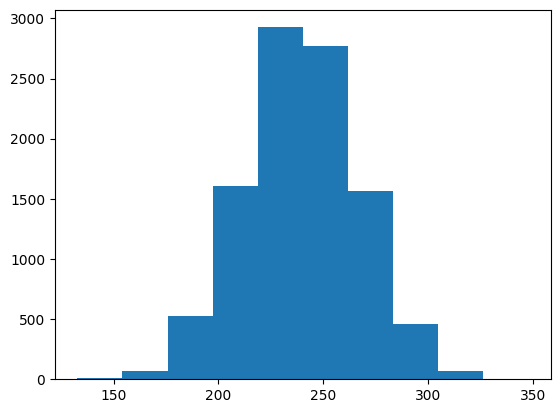

In [20]:
estimators = []
for _ in range(num_iterations):
    sample = np.random.choice(pickups, size=30)
    estimators.append(sample.mean())

plt.hist(estimators)